In [1]:
%cd ../src

/Users/edvardavagyan/Library/CloudStorage/GoogleDrive-edvard_avagyan20@alumni.aua.am/My Drive/PoseGraph/tgraphnet/src


In [2]:
%ls

__pycache__/  common/  evaluation/  graph/  models/
angles/       data/    features/    loss/   vizualization/


In [3]:
import os
from common.utils import Params, set_logger, copy_weight, load_checkpoint, save_checkpoint_pos_ori, write_log, get_lr, write_train_summary_scalars, write_val_summary_joint, change_momentum
from features.networks import TGraphNet
from vizualization.vizualize import plot_adjacency_matrix
from common.h36m_skeleton import get_node_names, get_edge_names
import torch
from graph import Graph

In [4]:
# Load parameters
json_path = os.path.join('../models/stgcn/run1/params.json')
assert os.path.isfile(json_path), "No json file found at {}".format(json_path)
params = Params(json_path)

In [8]:
checkpoint = torch.load('../models/stgcn/run1/best.pth.tar', map_location="cpu")

In [10]:
checkpoint['state_dict'].keys()

odict_keys(['pre.weight', 'pre.bias', 'pre.norm.weight', 'pre.norm.bias', 'pre.norm.running_mean', 'pre.norm.running_var', 'pre.norm.num_batches_tracked', 'layers.0.adj_v.0', 'layers.0.adj_e.0', 'layers.0.graph_stages.0.gc1.weight', 'layers.0.graph_stages.0.gc1.bias', 'layers.0.graph_stages.0.gc1.norm.weight', 'layers.0.graph_stages.0.gc1.norm.bias', 'layers.0.graph_stages.0.gc1.norm.running_mean', 'layers.0.graph_stages.0.gc1.norm.running_var', 'layers.0.graph_stages.0.gc1.norm.num_batches_tracked', 'layers.0.graph_stages.0.gc2.weight', 'layers.0.graph_stages.0.gc2.bias', 'layers.0.graph_stages.0.gc2.norm.weight', 'layers.0.graph_stages.0.gc2.norm.bias', 'layers.0.graph_stages.0.gc2.norm.running_mean', 'layers.0.graph_stages.0.gc2.norm.running_var', 'layers.0.graph_stages.0.gc2.norm.num_batches_tracked', 'layers.0.tcn.norm.weight', 'layers.0.tcn.norm.bias', 'layers.0.tcn.norm.running_mean', 'layers.0.tcn.norm.running_var', 'layers.0.tcn.norm.num_batches_tracked', 'layers.0.tcn.conv.we

In [6]:
model = TGraphNet(infeat_v=params.input_node_feat,
                  infeat_e=params.input_edge_feat,
                  nhid_v=params.num_hidden_nodes,
                  nhid_e=params.num_hidden_edges,
                  n_oute=params.output_edge_feat,
                  n_outv=params.output_node_feat,
                  gcn_window=params.gcn_window,
                  tcn_window=params.tcn_window,
                  in_frames=params.in_frames,
                  gconv_stages=params.gconv_stages,
                  num_groups=params.num_groups,
                  dropout=params.dropout,
                  aggregate=params.aggregate,
                  use_residual_connections=params.use_residual_connections,
                  use_non_parametric=params.use_non_parametric,
                  use_edge_conv=params.use_edge_conv,)

load_checkpoint('../models/stgcn/run1/best.pth.tar', model)

RuntimeError: Error(s) in loading state_dict for TGraphNet:
	Missing key(s) in state_dict: "adj_v", "adj_e". 

In [7]:
model.state_dict().keys()

odict_keys(['adj_v', 'adj_e', 'pre.weight', 'pre.bias', 'pre.norm.weight', 'pre.norm.bias', 'pre.norm.running_mean', 'pre.norm.running_var', 'pre.norm.num_batches_tracked', 'layers.0.adj_v.0', 'layers.0.adj_e.0', 'layers.0.graph_stages.0.gc1.weight', 'layers.0.graph_stages.0.gc1.bias', 'layers.0.graph_stages.0.gc1.norm.weight', 'layers.0.graph_stages.0.gc1.norm.bias', 'layers.0.graph_stages.0.gc1.norm.running_mean', 'layers.0.graph_stages.0.gc1.norm.running_var', 'layers.0.graph_stages.0.gc1.norm.num_batches_tracked', 'layers.0.graph_stages.0.gc2.weight', 'layers.0.graph_stages.0.gc2.bias', 'layers.0.graph_stages.0.gc2.norm.weight', 'layers.0.graph_stages.0.gc2.norm.bias', 'layers.0.graph_stages.0.gc2.norm.running_mean', 'layers.0.graph_stages.0.gc2.norm.running_var', 'layers.0.graph_stages.0.gc2.norm.num_batches_tracked', 'layers.0.tcn.norm.weight', 'layers.0.tcn.norm.bias', 'layers.0.tcn.norm.running_mean', 'layers.0.tcn.norm.running_var', 'layers.0.tcn.norm.num_batches_tracked', 'la

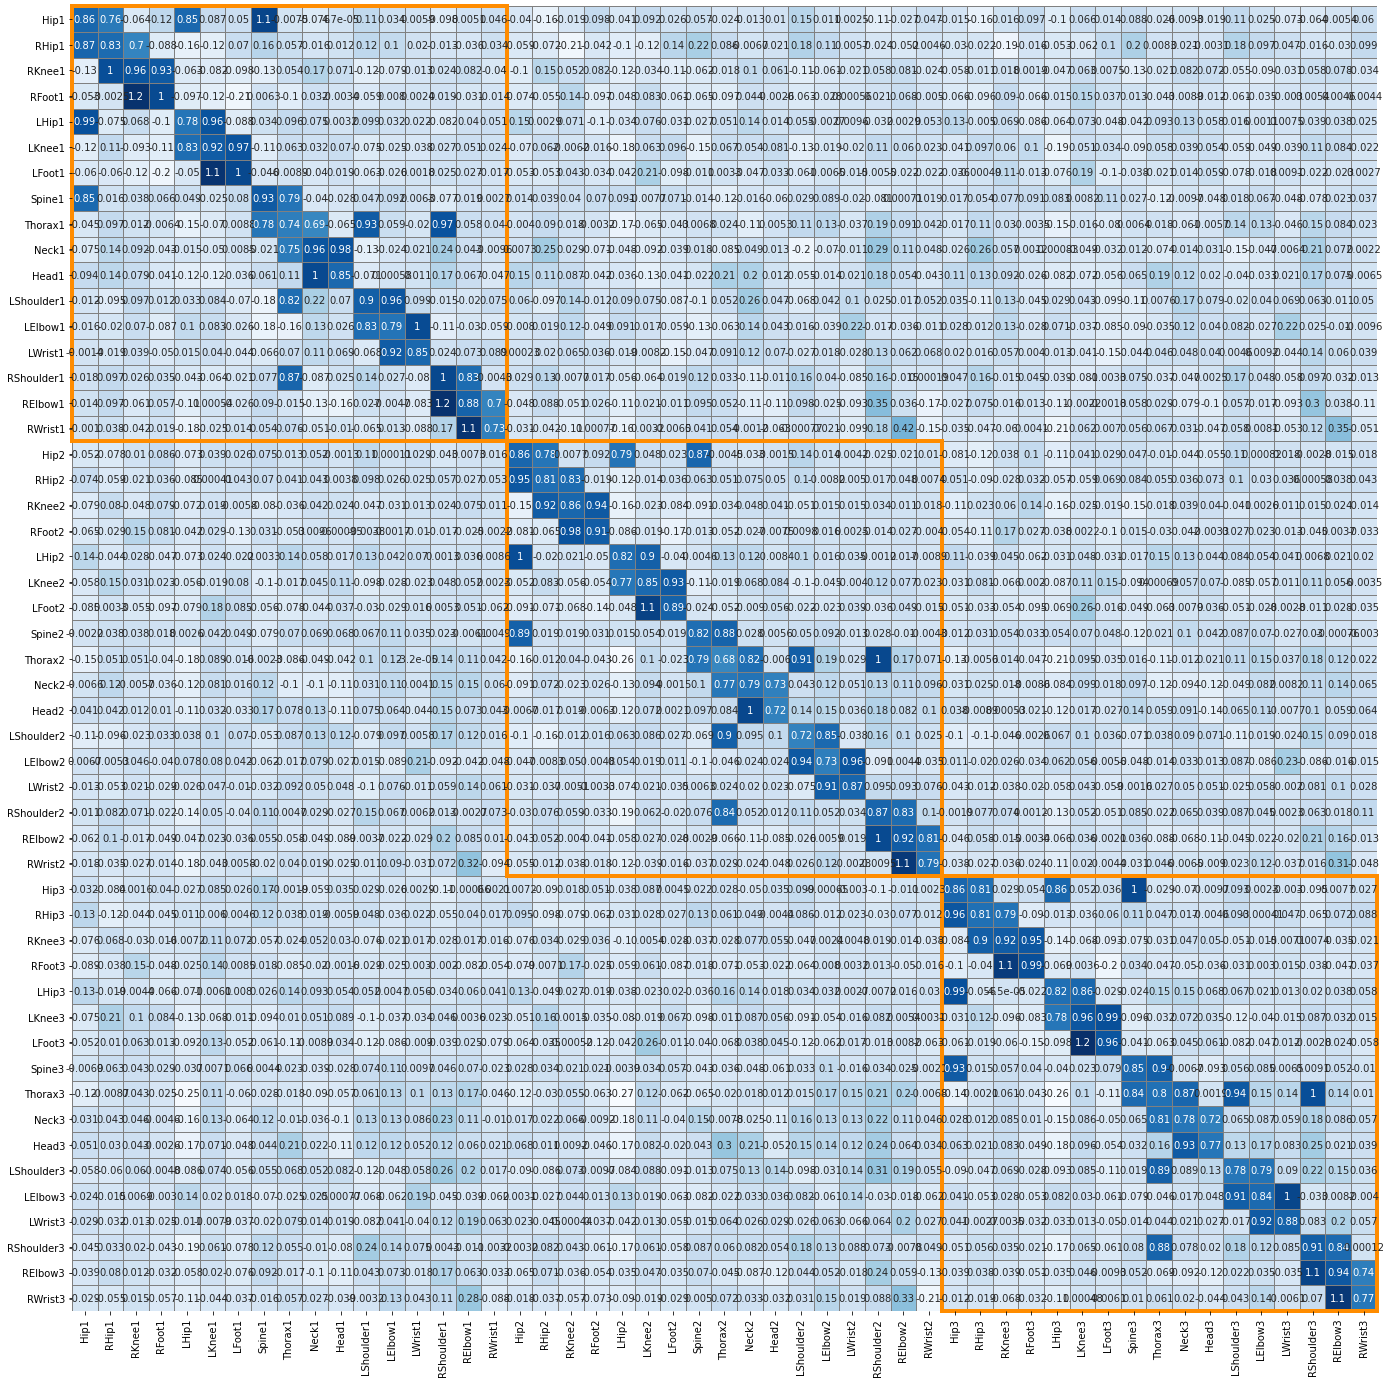

In [13]:
plot_adjacency_matrix(model.state_dict()['layers.2.adj_v.0'][0], node_names=get_node_names(3), annotate_values=True)